In [36]:
import pandas as pd
from prophet import Prophet

In [37]:
sp = pd.read_csv('C:/Users/nitip/Downloads/PFE.csv')
sp.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-04-10,41.150002,41.740002,41.119999,41.730000,39.688023,15137300
1,2023-04-11,41.799999,41.990002,41.700001,41.790001,39.745083,15304100
2,2023-04-12,41.630001,41.790001,41.270000,41.369999,39.345638,17035100
3,2023-04-13,41.529999,41.700001,41.299999,41.470001,39.440742,22880900
4,2023-04-14,41.509998,41.709999,40.930000,41.189999,39.174442,20627500


In [38]:
# Rename columns
sp.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)

In [39]:
# Select only the columns you need
sp = sp[['ds', 'y']]

In [40]:
# Convert 'ds' column to datetime 
sp['ds'] = pd.to_datetime(sp['ds'])

In [41]:
sp.head()

,ds,y
0,2023-04-10,41.730000
1,2023-04-11,41.790001
2,2023-04-12,41.369999
3,2023-04-13,41.470001
4,2023-04-14,41.189999


In [42]:
m = Prophet()
m.fit(sp)

20:51:46 - cmdstanpy - INFO - Chain [1] start processing
20:51:46 - cmdstanpy - INFO - Chain [1] done processing


In [43]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
610,2025-04-01
611,2025-04-02
612,2025-04-03
613,2025-04-04
614,2025-04-05


In [44]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
610,2025-04-01,22.494608,14.851238,30.768513
611,2025-04-02,22.358373,14.782388,30.588997
612,2025-04-03,22.198768,14.402152,30.699197
613,2025-04-04,22.257657,14.668288,30.596755
614,2025-04-05,22.977812,15.226094,31.181747


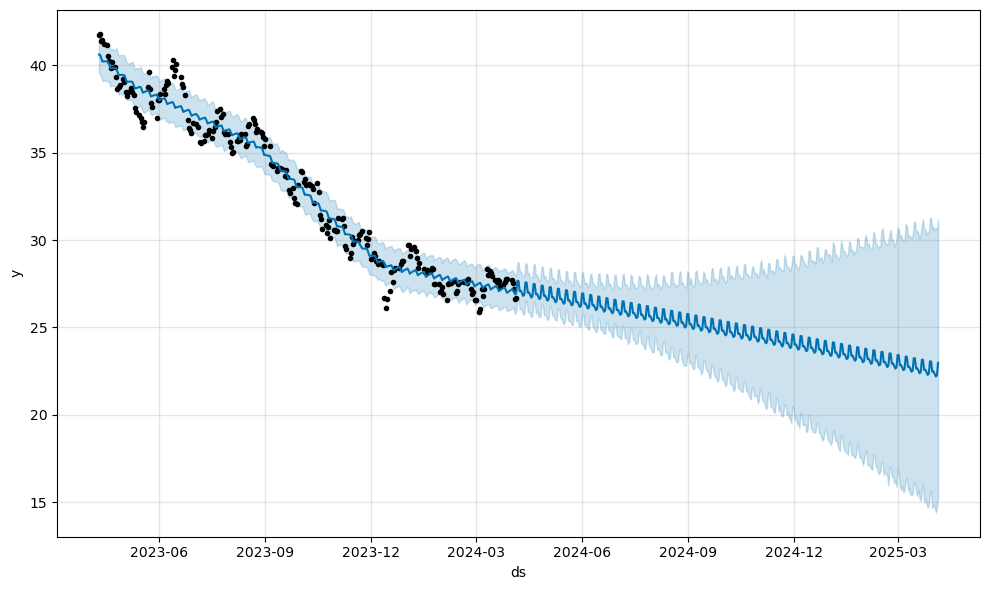

In [45]:
fig1 = m.plot(forecast)

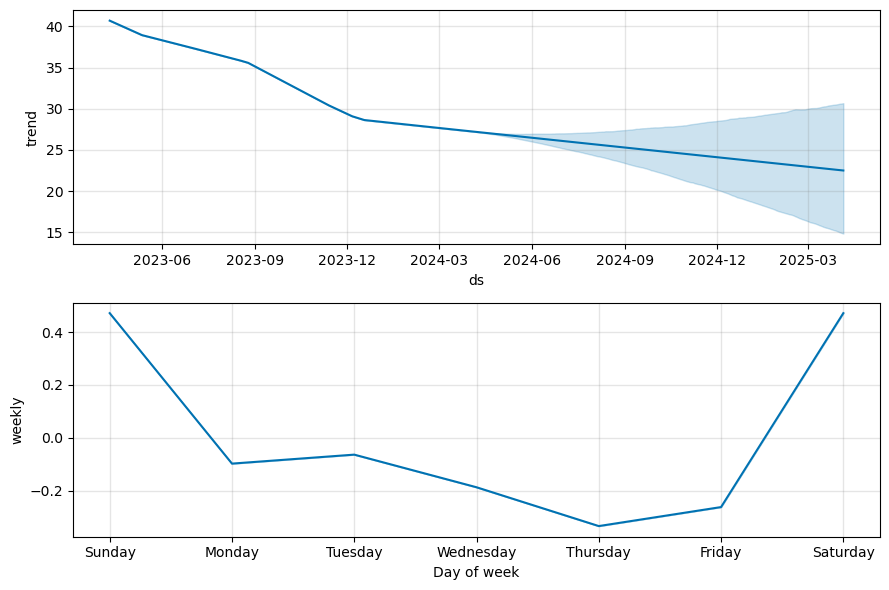

In [46]:
fig2 = m.plot_components(forecast)

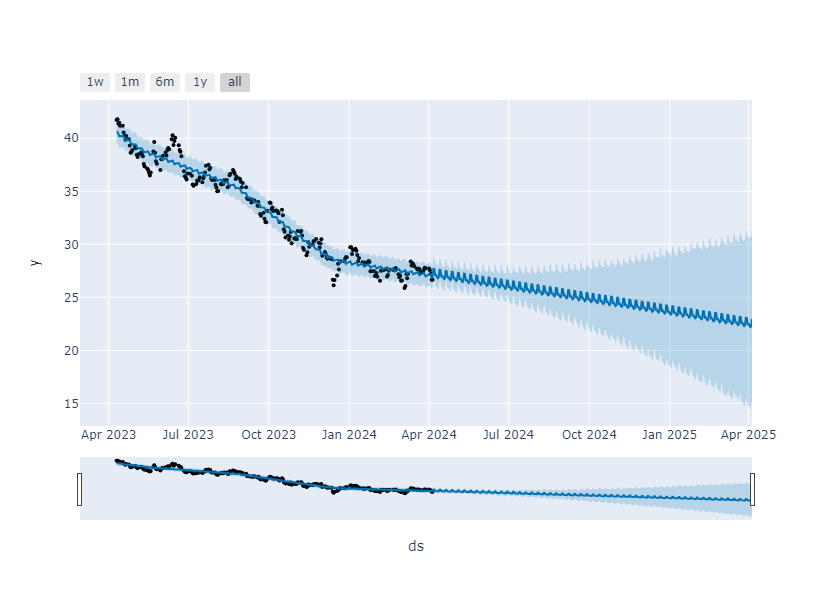

In [47]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

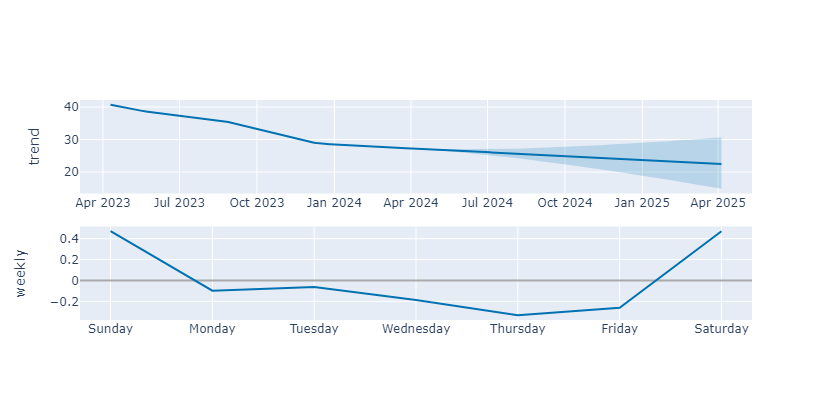

In [48]:
plot_components_plotly(m, forecast)